# Data Analysis with Python - Lab4

IBM course - Data Analysis with Python

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('automobileEDA.csv')
df = df.sort_index(axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aspiration         201 non-null    object 
 1   body-style         201 non-null    object 
 2   bore               201 non-null    float64
 3   city-L/100km       201 non-null    float64
 4   city-mpg           201 non-null    int64  
 5   compression-ratio  201 non-null    float64
 6   curb-weight        201 non-null    int64  
 7   diesel             201 non-null    int64  
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  engine-size        201 non-null    int64  
 11  engine-type        201 non-null    object 
 12  fuel-system        201 non-null    object 
 13  gas                201 non-null    int64  
 14  height             201 non-null    float64
 15  highway-mpg        201 non-null    int64  
 16  horsepower         201 non

# Linear Regression

<p>Simple Linear Regression: help us understand the relationship between two variables</p>

Yhat = a + bX

X: Predictor Variable
Y: Response Variable

In [45]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm

LinearRegression()

In [46]:
X = df[['highway-mpg']] #Linear regression models expect input data to be in a two-dimensional format
Y = df['price']

lm.fit(X,Y)

LinearRegression()

In [47]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [48]:
lm.intercept_

38423.3058581574

In [49]:
lm.coef_

array([-821.73337832])

### Yhat = a + bX

### Yhat = lm.intercept_ + lm.coef_ * X

### Price = 38423.31 - 821.73 * highway-mpg

In [51]:
#Train the model using "engine-size" as the independent variable and "price" as the dependent variable

lm1 = LinearRegression()

lm1.fit(df[['engine-size']],df['price'])

print('slope (a):', lm1.intercept_, '\nintercept (b):', lm1.coef_)

slope (a): -7963.338906281046 
intercept (b): [166.86001569]


### Price = -7963.33 + 166.86 * engine-size

# Multiple Linear Regression

In [55]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm2 = LinearRegression()

lm2.fit(Z, df['price'])

print('slope (a):', lm2.intercept_, '\nintercept (b):', lm2.coef_)

slope (a): -15806.624626329194 
intercept (b): [53.49574423  4.70770099 81.53026382 36.05748882]


### Price = -15806.62 + 53.49 * horsepower + 4.70 * curb-weight + 81.53 * engine-size + 36.05* highway-mpg

In [58]:
# Train a Multiple Linear Regression model "lm3" 
# where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg"

lm3 = LinearRegression()

lm3.fit(df[['normalized-losses','highway-mpg']], df['price'])

print('slope (a):', lm3.intercept_, '\nintercept (b):', lm3.coef_)

slope (a): 38201.31327245728 
intercept (b): [   1.49789586 -820.45434016]


### Price = 38201.31 + 1.49 * normalized-losses -820.45 * highway-mpg

# Model Evaluation Using Visualization

(0.0, 48170.21536737067)

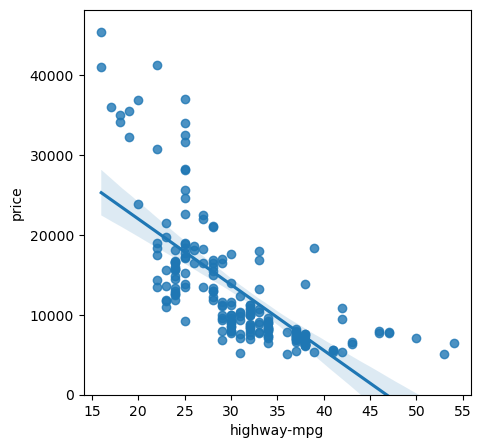

In [62]:
import seaborn as sns

height = 5
width = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,) # sets the limits of the y-axis of the plot with the minimum value set to 0

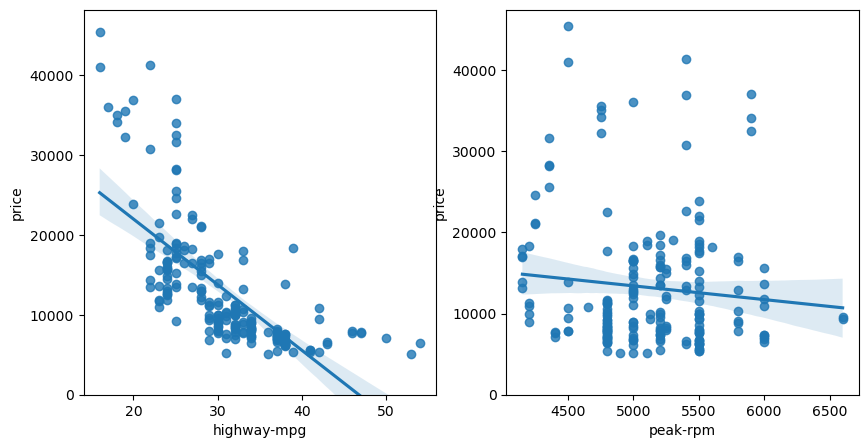

In [64]:
# Create a new subplot in the same figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
sns.regplot(x="highway-mpg", y="price", data=df, ax=axs[0])
axs[0].set_ylim(0,)

# Plot the second subplot
sns.regplot(x="peak-rpm", y="price", data=df, ax=axs[1])
axs[1].set_ylim(0,)

# Display the plots
plt.show()

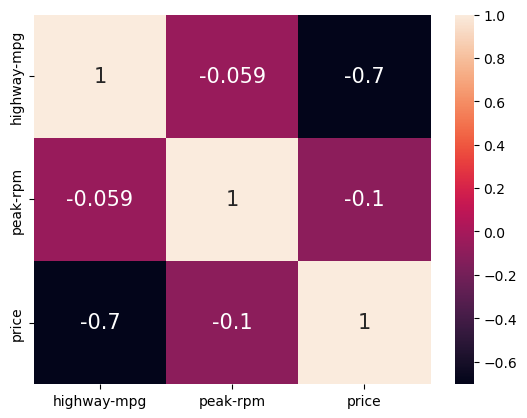

In [73]:
df_corr = df[['highway-mpg','peak-rpm', 'price']].corr()

sns.heatmap(df_corr, annot=True, annot_kws={"fontsize":15})
plt.show()

# Residual Plot

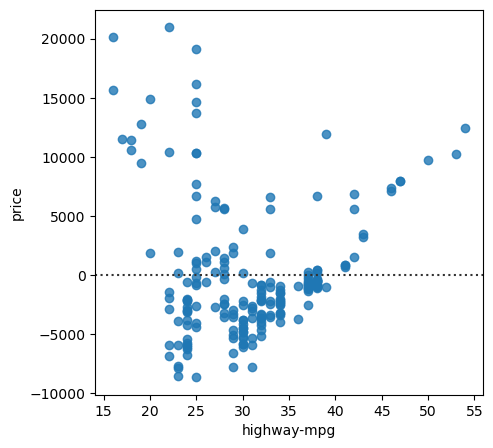

In [75]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

# Multiple Linear Regression

In [84]:
Y_hat = lm2.predict(Z)

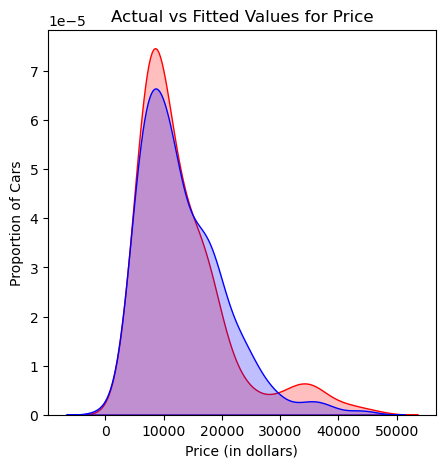

In [89]:
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], fill=True, color="r", label="Actual Value")
sns.kdeplot(Y_hat, fill=True, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


# Polynomial Regression and Pipelines